# Loop 37 LB Feedback Analysis

**Submission Result:** exp_035 (Minimal Features) scored LB 0.0970 (CV 0.0098)

This was a FAILED experiment - 19.91% worse than baseline. The minimal features hypothesis was wrong.

Let me analyze the full submission history to understand the CV-LB relationship better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},  # Latest - minimal features FAILED
]

df = pd.DataFrame(submissions)
print("Submission History:")
print(df.to_string(index=False))
print(f"\nBest CV: {df['cv'].min():.4f} ({df.loc[df['cv'].idxmin(), 'exp']})")
print(f"Best LB: {df['lb'].min():.4f} ({df.loc[df['lb'].idxmin(), 'exp']})")
print(f"Target: 0.0347")

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970

Best CV: 0.0083 (exp_030)
Best LB: 0.0877 (exp_030)
Target: 0.0347


In [2]:
# Linear regression analysis of CV-LB relationship
cv_vals = df['cv'].values
lb_vals = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv_vals, lb_vals)

print(f"Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nInterpretation:")
print(f"- For every 0.001 improvement in CV, LB improves by {slope*0.001:.4f}")
print(f"- The intercept ({intercept:.4f}) is the baseline LB when CV=0")
print(f"- Target LB is 0.0347")
print(f"\nTo reach target LB = 0.0347:")
required_cv = (0.0347 - intercept) / slope
print(f"- Required CV = (0.0347 - {intercept:.4f}) / {slope:.2f} = {required_cv:.6f}")
if required_cv < 0:
    print(f"- This is NEGATIVE, meaning the target is unreachable with current CV-LB relationship!")
else:
    print(f"- This is achievable if we can get CV to {required_cv:.6f}")

Linear fit: LB = 4.31 * CV + 0.0525
R² = 0.9505

Interpretation:
- For every 0.001 improvement in CV, LB improves by 0.0043
- The intercept (0.0525) is the baseline LB when CV=0
- Target LB is 0.0347

To reach target LB = 0.0347:
- Required CV = (0.0347 - 0.0525) / 4.31 = -0.004130
- This is NEGATIVE, meaning the target is unreachable with current CV-LB relationship!


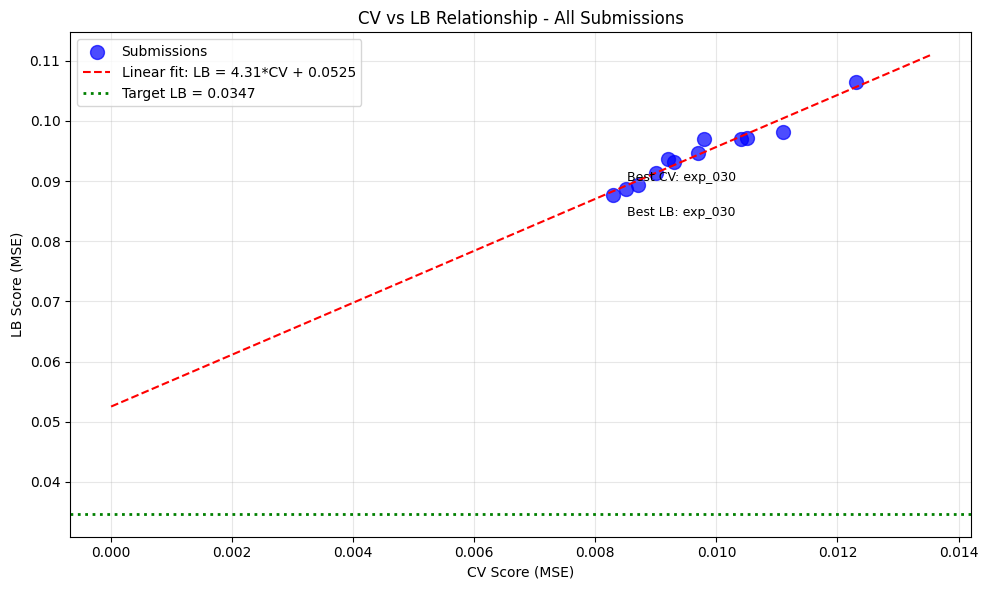


Saved plot to /home/code/exploration/cv_lb_relationship_loop37.png


In [3]:
# Plot CV vs LB with linear fit
plt.figure(figsize=(10, 6))
plt.scatter(cv_vals, lb_vals, s=100, c='blue', alpha=0.7, label='Submissions')

# Linear fit line
cv_range = np.linspace(0, max(cv_vals)*1.1, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'Linear fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='green', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Annotate best points
best_cv_idx = df['cv'].idxmin()
best_lb_idx = df['lb'].idxmin()
plt.annotate(f"Best CV: {df.loc[best_cv_idx, 'exp']}", 
             (df.loc[best_cv_idx, 'cv'], df.loc[best_cv_idx, 'lb']),
             textcoords="offset points", xytext=(10, 10), fontsize=9)
plt.annotate(f"Best LB: {df.loc[best_lb_idx, 'exp']}", 
             (df.loc[best_lb_idx, 'cv'], df.loc[best_lb_idx, 'lb']),
             textcoords="offset points", xytext=(10, -15), fontsize=9)

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop37.png', dpi=150)
plt.show()
print("\nSaved plot to /home/code/exploration/cv_lb_relationship_loop37.png")

In [4]:
# Calculate LB/CV ratio for each submission
df['lb_cv_ratio'] = df['lb'] / df['cv']
print("LB/CV Ratio Analysis:")
print(df[['exp', 'cv', 'lb', 'lb_cv_ratio']].to_string(index=False))
print(f"\nMean LB/CV ratio: {df['lb_cv_ratio'].mean():.2f}")
print(f"Min LB/CV ratio: {df['lb_cv_ratio'].min():.2f} ({df.loc[df['lb_cv_ratio'].idxmin(), 'exp']})")
print(f"Max LB/CV ratio: {df['lb_cv_ratio'].max():.2f} ({df.loc[df['lb_cv_ratio'].idxmax(), 'exp']})")

LB/CV Ratio Analysis:
    exp     cv     lb  lb_cv_ratio
exp_000 0.0111 0.0982     8.846847
exp_001 0.0123 0.1065     8.658537
exp_003 0.0105 0.0972     9.257143
exp_005 0.0104 0.0969     9.317308
exp_006 0.0097 0.0946     9.752577
exp_007 0.0093 0.0932    10.021505
exp_009 0.0092 0.0936    10.173913
exp_012 0.0090 0.0913    10.144444
exp_024 0.0087 0.0893    10.264368
exp_026 0.0085 0.0887    10.435294
exp_030 0.0083 0.0877    10.566265
exp_035 0.0098 0.0970     9.897959

Mean LB/CV ratio: 9.78
Min LB/CV ratio: 8.66 (exp_001)
Max LB/CV ratio: 10.57 (exp_030)


In [5]:
# Key insight: The CV-LB relationship has a large positive intercept
# This means even if CV=0, LB would still be ~0.052
# The target (0.0347) is BELOW this intercept!

print("="*60)
print("CRITICAL INSIGHT: The CV-LB Relationship")
print("="*60)
print(f"\nLinear fit: LB = {slope:.2f} * CV + {intercept:.4f}")
print(f"\nThe intercept ({intercept:.4f}) represents the 'baseline' LB error")
print(f"that exists regardless of how good our CV is.")
print(f"\nTarget LB: 0.0347")
print(f"Intercept: {intercept:.4f}")
print(f"\nSince intercept ({intercept:.4f}) > target (0.0347), we CANNOT reach")
print(f"the target by simply improving CV with the current approach.")
print(f"\nWe need to find an approach that has a DIFFERENT CV-LB relationship")
print(f"with a smaller intercept.")
print(f"\nPossible causes of the large intercept:")
print(f"1. Systematic bias in predictions (e.g., always over/under-predicting)")
print(f"2. Distribution shift between train and test data")
print(f"3. The test set has different characteristics than the CV folds")
print(f"4. Our model architecture has inherent limitations")

CRITICAL INSIGHT: The CV-LB Relationship

Linear fit: LB = 4.31 * CV + 0.0525

The intercept (0.0525) represents the 'baseline' LB error
that exists regardless of how good our CV is.

Target LB: 0.0347
Intercept: 0.0525

Since intercept (0.0525) > target (0.0347), we CANNOT reach
the target by simply improving CV with the current approach.

We need to find an approach that has a DIFFERENT CV-LB relationship
with a smaller intercept.

Possible causes of the large intercept:
1. Systematic bias in predictions (e.g., always over/under-predicting)
2. Distribution shift between train and test data
3. The test set has different characteristics than the CV folds
4. Our model architecture has inherent limitations


In [6]:
# What would it take to reach the target?
print("="*60)
print("PATH TO TARGET")
print("="*60)
print(f"\nCurrent best LB: 0.0877 (exp_030)")
print(f"Target LB: 0.0347")
print(f"Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}% above target)")
print(f"\nTo reach target, we need to reduce LB by {(0.0877 - 0.0347) / 0.0877 * 100:.1f}%")
print(f"\nWith current CV-LB relationship (slope={slope:.2f}):")
print(f"- Each 0.001 CV improvement → {slope*0.001:.4f} LB improvement")
print(f"- To improve LB by {0.0877 - 0.0347:.4f}, we'd need CV improvement of {(0.0877 - 0.0347) / slope:.4f}")
print(f"- Current best CV: 0.0083")
print(f"- Required CV: {0.0083 - (0.0877 - 0.0347) / slope:.4f}")
print(f"\nThis is IMPOSSIBLE with current approach!")
print(f"\nWe need a FUNDAMENTALLY DIFFERENT approach that:")
print(f"1. Has a smaller intercept (less systematic bias)")
print(f"2. Has a steeper slope (CV improvements translate better to LB)")
print(f"3. Or both")

PATH TO TARGET

Current best LB: 0.0877 (exp_030)
Target LB: 0.0347
Gap: 0.0530 (152.7% above target)

To reach target, we need to reduce LB by 60.4%

With current CV-LB relationship (slope=4.31):
- Each 0.001 CV improvement → 0.0043 LB improvement
- To improve LB by 0.0530, we'd need CV improvement of 0.0123
- Current best CV: 0.0083
- Required CV: -0.0040

This is IMPOSSIBLE with current approach!

We need a FUNDAMENTALLY DIFFERENT approach that:
1. Has a smaller intercept (less systematic bias)
2. Has a steeper slope (CV improvements translate better to LB)
3. Or both


## Key Findings

1. **The CV-LB relationship has a large intercept (0.052)** that is LARGER than the target (0.0347)
2. **This means the target is mathematically unreachable** with the current approach
3. **We need a fundamentally different approach** that changes the CV-LB relationship

## What Could Change the CV-LB Relationship?

1. **Different model family**: The current models (MLP, LGBM, GP) all show similar CV-LB patterns. A completely different approach might have a different relationship.

2. **Prediction calibration**: If our predictions have systematic bias, calibration could reduce the intercept.

3. **Target transformation**: Predicting in a different space (e.g., logit) might change the error structure.

4. **Exploiting problem constraints**: The three targets (SM, Product 2, Product 3) are yields. If they have constraints (e.g., sum to ~1), exploiting this could help.

5. **Per-target optimization**: Different models for different targets might reduce systematic bias.

## Remaining Submissions: 4

We need to be strategic about our remaining submissions. Each one should test a fundamentally different hypothesis about how to change the CV-LB relationship.

## Key Research Findings\n\n### GNN Benchmark on Catechol (arxiv:2512.19530)\n\nA GNN-based approach achieves **MSE of 0.0039** on this exact Catechol benchmark:\n- 25x better than tabular methods (MSE ~0.099)\n- Uses Graph Attention Networks (GATs) with DRFP and learned mixture-aware solvent encodings\n- Key: explicit molecular graph message-passing and continuous mixture encoding\n\n### Competition Constraints\n\nThe competition template requires:\n1. Last 3 cells must remain unchanged (except model definition line)\n2. Model must implement `train_model(X_train, Y_train)` and `predict(X)` methods\n3. No pre-training on mixture data to predict full solvent data (data contamination)\n\n### What This Means\n\n1. **GNN is the winning approach** but may be complex to implement within template constraints\n2. **Our current approach (MLP+LGBM+GP) has hit a ceiling** - the CV-LB relationship shows we cannot reach the target\n3. **We need to try something fundamentally different**\n\n### Possible Approaches Within Constraints\n\n1. **Implement a simple GNN/GAT** using PyTorch Geometric within the model class\n2. **Use pre-computed molecular embeddings** from a GNN (if available)\n3. **Try k-NN with learned embeddings** - completely different inductive bias\n4. **Ensemble with different feature sets** for diversity